![example](images/director_shot.jpeg)

# Project Title

**Authors:** Doug, Carlos, Michael
***

## What Better Way To Launch Microsoft's New Movie Other Than An Original Blockbuster Series?!



## Business Problem

By creating our own series, we can create more loyal and dedicated fans.
But we must do it right 
-

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [4]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [51]:
# Load the necessary data from out dataset

df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz', delimiter = ',')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [52]:
# Filter out unnecessary columns 

df_month_year = df[['release_date', 'production_budget','worldwide_gross']]

In [53]:
# Take away '$' from columns with money in order to manipulate the data

df['worldwide_gross'] = df['worldwide_gross'].str[1:]
df['production_budget'] = df['production_budget'].str[1:]
df['domestic_gross'] = df['domestic_gross'].str[1:]

In [54]:
# Remove the commas from the numbers and cast them to int64 using numpy

df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(np.int64)
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(np.int64)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').astype(np.int64)
df_template = df

In [55]:
df_template['year'] = df['release_date'].str[-4:]
df_template['year'] = pd.to_numeric(df_template['year'])
df_template['month'] = df_template['release_date'].str[:3]

In [56]:
df_template.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec


In [57]:
# Filter the data to fit the criteria for Microsoft's movie launch
# Past 20 years
# Production budget over $1,000,000 (decently funded movies)
# Positive gross at box office

df_month_year = df_template[df_template['year'] > 2000]
df_month_year = df_month_year[df_month_year['production_budget'] > 1000000]
df_month_year = df_month_year[df_month_year['worldwide_gross'] > 0]

In [58]:
df_complete = df_month_year[['production_budget','worldwide_gross', 'year', 'month']]
df_complete.sort_values(by = 'year')

,production_budget,worldwide_gross,year,month
2380,23000000,21973182,2001,Oct
223,137000000,85131830,2001,Jul
1359,42000000,56331864,2001,Mar
1306,45000000,29406132,2001,Jan
3208,14000000,10397365,2001,Feb
...,...,...,...,...
1829,31000000,48791187,2019,Feb
2292,25000000,11367029,2019,Jan
3871,8000000,36005871,2019,May
2520,20000000,69911903,2019,Feb


In [59]:
# Order month by order in the calender

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_complete['month'] = pd.Categorical(df_complete['month'], categories=months, ordered=True)
df_complete = df_complete['month'].sort_values()
df_complete = list(df_complete)

<ipython-input-59-ebcff9b8677c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['month'] = pd.Categorical(df_complete['month'], categories=months, ordered=True)


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# In order to model this data, we had to first create new columns to represent the different months within a year.
# We then iterated through our old dataset and populated our new 'months_df' dataset to find the frequency

In [ ]:
# Order month by order in the calender then sort the calenders in order from Jan-Dec

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_complete['month'] = pd.Categorical(df_complete['month'], categories=months, ordered=True)
df_complete = df_complete['month'].sort_values()
df_complete = list(df_complete)

In [ ]:
# Initialize new dataframe with 1 row, 12 columns with value: 0 to read frequency of each month

column_names = months
a = np.zeros(shape=(1,12), dtype = int)
df_months = pd.DataFrame(a, columns = column_names)

for x in df_complete:
    if x in column_names:
        df_months[x] += 1

In [ ]:
# Get the values from this function and copy them below *here*

list(df_months.value_counts().index)

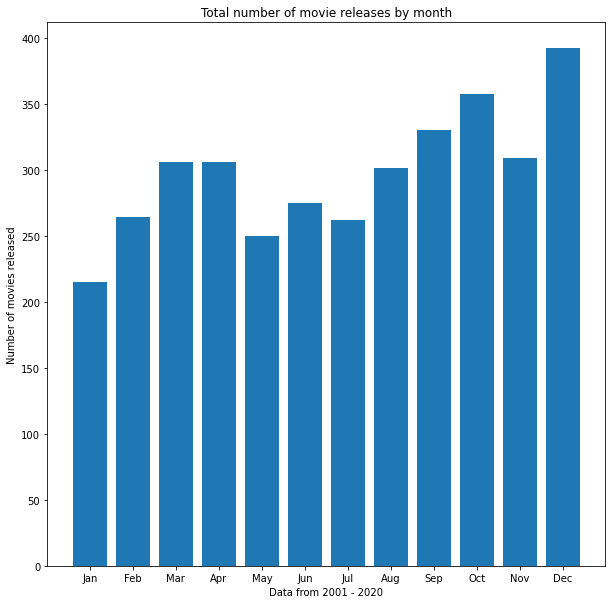

In [65]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 10))
x = months
#y = [*here*]
y = [215, 264, 306, 306, 250, 275, 262, 301, 330, 357, 309, 392]
ax.bar(x, y);
ax.set_title('Total number of movie releases by month')
ax.set_xlabel('Data from 2001 - 2020')
ax.set_ylabel('Number of movies released');

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***